In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

iris = datasets.load_iris()

In [2]:
X = iris.data
y = iris.target

In [3]:
X = X[y<2, :2] #一共有三种label，三种鸢尾花，我们现在选取前两种：选择y==0或者y==1的样本，这些样本的前两个特征
y = y[y<2]
print(X.shape)
print(y.shape)

(100, 2)
(100,)


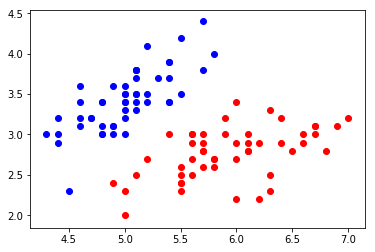

In [4]:
plt.scatter(X[y==0, 0],X[y==0, 1], color = 'b')
plt.scatter(X[y==1, 0],X[y==1, 1], color = 'r')
plt.show()

### Using Logistic Regression

In [5]:
import sys
sys.path.append("..")
from myML.model_selection import my_train_test_split

X_train, X_test, y_train, y_test = my_train_test_split(X, y, seed = 666)
#因为这里不用调参，所以没有选用交叉沿着cross validation

In [6]:
from myML.LogisticRegression import myLogisticRegression

log_reg = myLogisticRegression()
log_reg.fit(X_train, y_train)

Bessie: myLogisticRegression().

In [7]:
log_reg.score(X_test, y_test) #100%正确

1.0

In [8]:
log_reg.predict_proba(X_test)

array([0.9297264 , 0.98665137, 0.14851233, 0.01685708, 0.03697949,
       0.01866111, 0.04936428, 0.9966931 , 0.97994217, 0.7452538 ,
       0.04472737, 0.00339218, 0.26130536, 0.03697949, 0.84193744,
       0.79893022, 0.82890999, 0.32357568, 0.06534762, 0.20734526])

In [9]:
log_reg.predict(X_test)

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [10]:
y_test

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0])

In [11]:
y_test == log_reg.predict(X_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [12]:
log_reg.coef_

array([ 3.01807431, -5.04464761])

In [13]:
log_reg.interception_

-0.6938162524426628

### Decision Boundary

In [14]:
def x2(x1):
    theta_0 = log_reg.interception_
    theta_1 = log_reg.coef_[0]
    theta_2 = log_reg.coef_[1]
    return (-theta_1 * x1 - theta_0) / theta_2

In [15]:
x1_plot = np.linspace(4,8,1000)
x2_plot = x2(x1_plot)

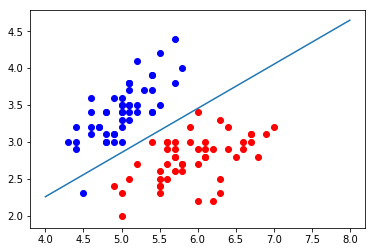

In [16]:
plt.scatter(X[y==0, 0],X[y==0, 1], color = 'b')
plt.scatter(X[y==1, 0],X[y==1, 1], color = 'r')
plt.plot(x1_plot, x2_plot)
plt.show()

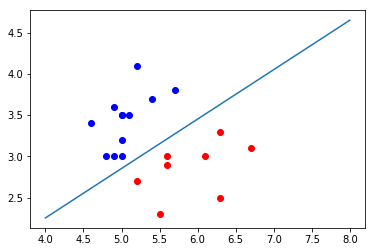

In [17]:
plt.scatter(X_test[y_test==0, 0],X_test[y_test==0, 1], color = 'b')
plt.scatter(X_test[y_test==1, 0],X_test[y_test==1, 1], color = 'r')
plt.plot(x1_plot, x2_plot)
plt.show()

#### 上述完全归类正确，因为都是X_test的点

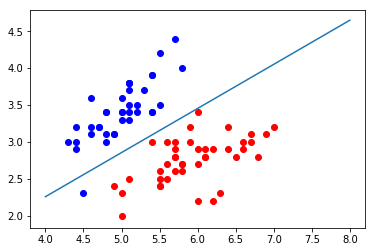

In [18]:
plt.scatter(X_train[y_train==0, 0],X_train[y_train==0, 1], color = 'b')
plt.scatter(X_train[y_train==1, 0],X_train[y_train==1, 1], color = 'r')
plt.plot(x1_plot, x2_plot)
plt.show()

#### 上述没有完全归类正确，因为都是X_train的点

In [19]:
def plot_decision_boundary(model, axis):
    
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    #以上，是将传入的要绘制的坐标值范围，一个单位上画100个点。
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)


/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


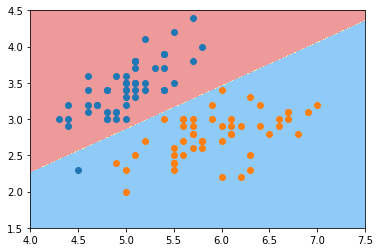

In [20]:
plot_decision_boundary(log_reg, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

### kNN的决策边界
kNN的决策边界没有表达式，因为不是线性的，但是我们的函数的暴力枚举，依旧可以绘制

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [22]:
knn_clf.score(X_test, y_test)

1.0

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


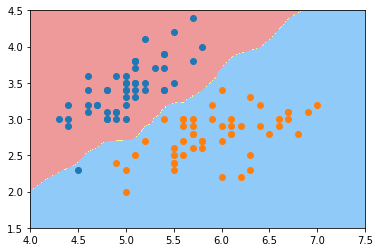

In [23]:
plot_decision_boundary(knn_clf, axis=[4, 7.5, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.show()

#### 对所有的鸢尾花样本做分类 

In [24]:
knn_clf_all = KNeighborsClassifier()
knn_clf_all.fit(iris.data[:, :2], iris.target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


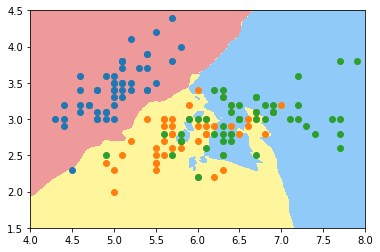

In [25]:
X = iris.data
y = iris.target
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

#### 上面的决策边界，非常不规则，表现出了过拟合。意味着模型过于复杂，因为我们knn的默认k=3，k越小模型越复杂。

/Users/bessie/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'linewidth'
  s)


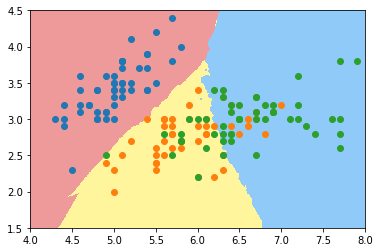

In [26]:
knn_clf_all = KNeighborsClassifier(n_neighbors=50)
knn_clf_all.fit(iris.data[:, :2], iris.target)
X = iris.data
y = iris.target
plot_decision_boundary(knn_clf_all, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()

#### 上面的决策边界，比较规则。k=50，模型更简单，例如当k=样本时候，只需要计算出全部样本的vote，不用一一计算距离。